# Data Wrangling Template

## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
predictImg_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img_response = requests.get(predictImg_url)

#save the downloaded file 
with open(predictImg_url.split('/')[-1], mode = 'wb') as file:
    file.write(img_response.content)
    
# load the file into a dataframe
img_predict_df = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

In [3]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193


AttributeError: module 'tweepy' has no attribute 'TweepError'

In [4]:
list_tweet = []
with open('tweet-json.txt', 'r') as file:   
    for line in file:
        tweet = json.loads(line)
        list_tweet.append(tweet)
        
df_tweet = pd.DataFrame()

df_tweet['tweet_id'] = list(map(lambda tweet: tweet['id'], list_tweet))
df_tweet['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], list_tweet))
df_tweet['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], list_tweet))
df_tweet['created_at'] = list(map(lambda tweet: tweet['created_at'], list_tweet))
df_tweet['full_text'] = list(map(lambda tweet: tweet['full_text'], list_tweet))
        



## Assess

#### Visual Assessment

In [5]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- Missing Dog stages as none instead of Nan

In [6]:
img_predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Dog name predictions start with both lowercase and other in uppercase

In [7]:
df_tweet

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...


#### Programatic Assessment

In [8]:
# Functions to assess the data
info = lambda x: x.info()
describe = lambda x: x.describe()
shape = lambda x: x.shape
null = lambda x: x.isnull().sum()
duplicates = lambda x: x.duplicated().sum()
counts = lambda x: x.value_counts()
dataType = lambda x: x.dtypes
unique = lambda x: x.unique()


- asssess twitter_archived_enhaced data

In [9]:
#Find summary of the data
info(df_archive)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Invalid datatypes; timestamp, source

In [11]:
shape(df_archive)

(2356, 17)

- Dataset has 2356 rows and columns

In [12]:
null(df_archive)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

- dataset has some columns missing values; retweeted_status_id
- Invalid tweet_id that are retweets
- Dog stages stored in different columns

In [13]:
duplicates(df_archive)

0

- No duplicate values

In [14]:
counts(df_archive['rating_denominator'])

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

- Most tweets have the value 10 as the denominator
- invalid denominator of 0
- Inaccurate denominators of values > 10

In [15]:
pd.set_option('display.max_rows', df_archive.shape[0]+1)
counts(df_archive['name'])

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

- invalid dog names; 'none', 'a', 'an','none', 'just','one','all','my','o','his','not','quite' and 'the'

In [16]:
df_archive.query("timestamp >= '2017/08/01'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- No tweets after the date 2017/08/01

In [17]:
df_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


- Dogs with multiple stage names;
doggo|puppo,doggo|pupper,doggo|floofer

- Assess image_predictions data

In [18]:
info(img_predict_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Basic summary
- Non descriptive column names; p1,p2,p3,p1_conf,p2_conf, p3_conf

In [19]:
null(img_predict_df)

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

- No missing values for the dataset

In [20]:
duplicates(img_predict_df)

0

- No duplicate values

-Asses Twitter data

In [21]:
info(df_tweet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   full_text       2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


- Basic summmary

In [22]:
null(df_tweet)

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

- No missing values

In [23]:
duplicates(df_tweet)

0

- No duplicates

Quality Issues
 Completeness
1. invalid tweets_id that are retweets
2. df_archive: null values for columns; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp
3. df_archive: invalid dog name; 
- 'None','a','the','an','very','quite','just','getting','not','actually','old','light','life','officially','by','infuriating',
  'such','all','unacceptable','this','mad','his','my','incredible','space' 

Validity  
4. Erroneous datatypes
- df_archive: timestamp has object datatype 
- df_archive: 'source' has datatype as object instead of category
5. img_predict_df: Non descriptive column headers;p1, p2, p3
6. df_archive: 'stage' has null records as 'None'


Accuracy  
7. df_archive: has one record with a denominator of Zero
8. df_achive: incorrect rating_denominator with values greater than 10

Consistency  
9. img_predict_df: Inconsistent where some dog names(p1,02,p3) start with lowercase and others with uppercase
Tidiness issues
1. merge the 3 datasets to one 
2. duplicate columns 'tweet_id', 'created_date' and 'timestamp', 'text' and 'full text'
3. dog stages stored in different columns 


## Clean

In [24]:
c_df_archive = df_archive.copy()
c_img_predict_df = img_predict_df.copy()
c_df_tweet = df_tweet.copy()


#### Define

1. Select and Drop columns with retweeted_status_id

#### Code

In [25]:
c_df_archive = c_df_archive[pd.isnull(c_df_archive['retweeted_status_id'])]

#### Test

In [26]:
c_df_archive.shape

(2175, 17)

#### Define

2. Drop null columns; 'retweeted_status_id','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'

#### Code

In [27]:
columns = ['retweeted_status_id','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp']
c_df_archive.drop(columns, axis=1, inplace=True)

#### Test

In [28]:
c_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define

3. change dtype for timestamp from object to datetime

#### Code

In [29]:
c_df_archive['timestamp'] = c_df_archive['timestamp'].astype('datetime64[ns]')

#### Test

In [30]:
c_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


#### Define

4. change dtype for 'source' from object to category

#### Code

In [31]:
c_df_archive['source'] = c_df_archive['source'].astype('category')

#### Test

In [32]:
c_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   category      
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 206.2+ KB


#### Define

5.  renamed columns with descriptive column headers;p1, p1_conf,p2, p3, p3_conf to prediction1,prediction2,prediction3,p1_confidence,p2_confidence,p3_confidence

#### Code

In [33]:
dict = {'p1':'prediction1',
           'p1_conf': 'p1_confidence',
           'p2':'prediction2',
           'p2_conf': 'p2_confidence','p3':'prediction3', 
           'p3_conf':'p3_confidence'}
c_img_predict_df.rename(columns=dict, inplace = True)


#### Test

In [34]:
c_img_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2075 non-null   int64  
 1   jpg_url        2075 non-null   object 
 2   img_num        2075 non-null   int64  
 3   prediction1    2075 non-null   object 
 4   p1_confidence  2075 non-null   float64
 5   p1_dog         2075 non-null   bool   
 6   prediction2    2075 non-null   object 
 7   p2_confidence  2075 non-null   float64
 8   p2_dog         2075 non-null   bool   
 9   prediction3    2075 non-null   object 
 10  p3_confidence  2075 non-null   float64
 11  p3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define

6.Rename dog names(p1,p2,p3) to all start with uppercase

#### Code

In [35]:
c_img_predict_df['prediction1'] = c_img_predict_df['prediction1'].str.title()
c_img_predict_df['prediction2'] = c_img_predict_df['prediction2'].str.title()
c_img_predict_df['prediction3'] = c_img_predict_df['prediction3'].str.title()

#### Test

In [36]:
c_img_predict_df.head(5)

,tweet_id,jpg_url,img_num,prediction1,p1_confidence,p1_dog,prediction2,p2_confidence,p2_dog,prediction3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

7. Select and Drop all invalid dog names

#### Code

In [37]:
c_df_archive[c_df_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [38]:
list = ['None','a', 'the', 'an','very','quite','just','getting','not','actually','old','light','life','officially','by',
        'infuriating','such','all','unacceptable','this','mad','his','my','incredible','space']
c_df_archive['name'].replace(list,np.nan, inplace=True)

#### Test

In [39]:
null(c_df_archive)

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          58
rating_numerator        0
rating_denominator      0
name                  779
doggo                   0
floofer                 0
pupper                  0
puppo                   0
dtype: int64

In [40]:
c_df_archive['name']

0              Phineas
1                Tilly
2               Archie
3                Darla
4             Franklin
5                  NaN
6                  Jax
7                  NaN
8                 Zoey
9               Cassie
10                Koda
11               Bruno
12                 NaN
13                 Ted
14              Stuart
15              Oliver
16                 Jim
17                Zeke
18             Ralphus
20              Gerald
21             Jeffrey
22                 NaN
23              Canela
24                 NaN
25                 NaN
26                Maya
27              Mingus
28               Derek
29              Roscoe
30                 NaN
31             Waffles
33               Jimbo
34              Maisey
35                 NaN
37                 NaN
38                Earl
39                Lola
40               Kevin
41                 NaN
42                 NaN
43                Yogi
44                Noah
45               Bella
46         

In [41]:
c_df_archive.query("name == 'None'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

8. Drop row with 'rating_denominator' as Zero and greater than 10

#### Code

In [42]:
c_df_archive = c_df_archive[(c_df_archive['rating_denominator'] != 0) & (c_df_archive['rating_denominator'] == 10)]

#### Test

In [43]:
counts(c_df_archive['rating_denominator'])

10    2153
Name: rating_denominator, dtype: int64

### Tidiness

#### Define  

1. Find dogs with multiple columns, Merge dog stages to one column 'stage' to store the dog stages  and delete the four columns doggo, floofer,pupper,puppo

#### Code

In [44]:
c_df_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1809
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [45]:
c_df_archive.doggo.replace('None', '', inplace=True)
c_df_archive.doggo.replace(np.NaN, '', inplace=True)
c_df_archive.floofer.replace('None', '', inplace=True)
c_df_archive.floofer.replace(np.NaN, '', inplace=True)
c_df_archive.pupper.replace('None', '', inplace=True)
c_df_archive.pupper.replace(np.NaN, '', inplace=True)
c_df_archive.puppo.replace('None', '', inplace=True)
c_df_archive.puppo.replace(np.NaN, '', inplace=True)

In [46]:
c_df_archive['stage'] = c_df_archive.doggo + c_df_archive.floofer + c_df_archive.pupper + c_df_archive.puppo
c_df_archive.loc[c_df_archive.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
c_df_archive.loc[c_df_archive.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
c_df_archive.loc[c_df_archive.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
c_df_archive.loc[c_df_archive.stage == 'flofferpupper', 'stage'] = 'floofer, pupper'
c_df_archive.loc[c_df_archive.stage == 'flofferpuppo', 'stage'] = 'floofer, puppo'
c_df_archive.loc[c_df_archive.stage == 'pupperpuppo', 'stage'] = 'pupper, puppo'

In [47]:
c_df_archive['stage'].value_counts()

                  1809
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

- Delete column names doggo, floofer,pupper,puppo

In [48]:
c_df_archive.drop(columns = ['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [49]:
counts(c_df_archive['stage'])

                  1809
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [50]:
c_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2153 non-null   int64         
 1   timestamp           2153 non-null   datetime64[ns]
 2   source              2153 non-null   category      
 3   text                2153 non-null   object        
 4   expanded_urls       2099 non-null   object        
 5   rating_numerator    2153 non-null   int64         
 6   rating_denominator  2153 non-null   int64         
 7   name                1393 non-null   object        
 8   stage               2153 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 153.7+ KB


#### Define
2. Merge the 3 dataframes into a single dataset

#### Code

In [51]:
# merge the 3 datasets
df_1 = pd.merge(c_df_archive, c_img_predict_df, on='tweet_id')
df_2 = pd.merge(df_1, df_tweet, on = 'tweet_id')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   int64         
 1   timestamp           1976 non-null   datetime64[ns]
 2   source              1976 non-null   category      
 3   text                1976 non-null   object        
 4   expanded_urls       1976 non-null   object        
 5   rating_numerator    1976 non-null   int64         
 6   rating_denominator  1976 non-null   int64         
 7   name                1352 non-null   object        
 8   stage               1976 non-null   object        
 9   jpg_url             1976 non-null   object        
 10  img_num             1976 non-null   int64         
 11  prediction1         1976 non-null   object        
 12  p1_confidence       1976 non-null   float64       
 13  p1_dog              1976 non-null   bool        

In [52]:
# create a copy of the original dataset
df = df_2.copy()

In [53]:
df.to_csv('tweet_full.csv', index = False, encoding = 'utf-8')

In [54]:
df.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,prediction2,p2_confidence,p2_dog,prediction3,p3_confidence,p3_dog,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False,3261,20562,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,2158,12041,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True,16716,56848,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,4429,28226,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a c

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   int64         
 1   timestamp           1976 non-null   datetime64[ns]
 2   source              1976 non-null   category      
 3   text                1976 non-null   object        
 4   expanded_urls       1976 non-null   object        
 5   rating_numerator    1976 non-null   int64         
 6   rating_denominator  1976 non-null   int64         
 7   name                1352 non-null   object        
 8   stage               1976 non-null   object        
 9   jpg_url             1976 non-null   object        
 10  img_num             1976 non-null   int64         
 11  prediction1         1976 non-null   object        
 12  p1_confidence       1976 non-null   float64       
 13  p1_dog              1976 non-null   bool        

#### Define

3. Remove Duplicate and irrelevant columns

#### Code

In [56]:
columns = ['text','expanded_urls','jpg_url', 'created_at', 'rating_numerator','rating_denominator','created_at','full_text']
df.drop(columns, axis=1,inplace=True)

#### Test

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1976 non-null   int64         
 1   timestamp       1976 non-null   datetime64[ns]
 2   source          1976 non-null   category      
 3   name            1352 non-null   object        
 4   stage           1976 non-null   object        
 5   img_num         1976 non-null   int64         
 6   prediction1     1976 non-null   object        
 7   p1_confidence   1976 non-null   float64       
 8   p1_dog          1976 non-null   bool          
 9   prediction2     1976 non-null   object        
 10  p2_confidence   1976 non-null   float64       
 11  p2_dog          1976 non-null   bool          
 12  prediction3     1976 non-null   object        
 13  p3_confidence   1976 non-null   float64       
 14  p3_dog          1976 non-null   bool          
 15  retw

### Storing Data

In [58]:
df.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

### Analyzing and Visualizing Data

In [59]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [60]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1976 non-null   int64  
 1   timestamp       1976 non-null   object 
 2   source          1976 non-null   object 
 3   name            1352 non-null   object 
 4   stage           306 non-null    object 
 5   img_num         1976 non-null   int64  
 6   prediction1     1976 non-null   object 
 7   p1_confidence   1976 non-null   float64
 8   p1_dog          1976 non-null   bool   
 9   prediction2     1976 non-null   object 
 10  p2_confidence   1976 non-null   float64
 11  p2_dog          1976 non-null   bool   
 12  prediction3     1976 non-null   object 
 13  p3_confidence   1976 non-null   float64
 14  p3_dog          1976 non-null   bool   
 15  retweet_count   1976 non-null   int64  
 16  favorite_count  1976 non-null   int64  
dtypes: bool(3), float64(3), int64(4),

- count of tweets from different sources

In [61]:
df_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1937
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

1. Majority of the tweets are from iphone users.

- Distribution of dog stages

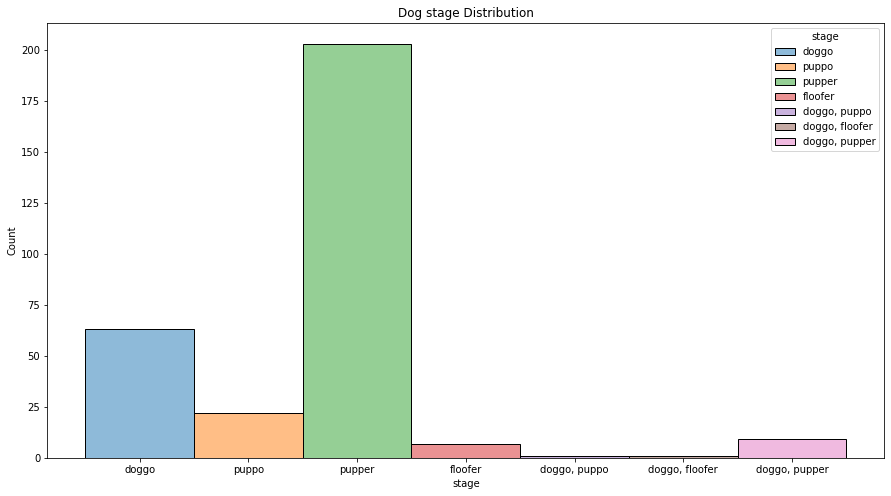

In [62]:
plt.figure(figsize=(15,8))
sn.histplot(data = df_master, x = 'stage', hue= 'stage').set(title='Dog stage Distribution');


2. From the above visualization highest number of dogs are in pupper stage and floofer stage has the least number of dogs

In [63]:
df_master[df_master['favorite_count'] == df_master['favorite_count'].max()]

,tweet_id,timestamp,source,name,stage,img_num,prediction1,p1_confidence,p1_dog,prediction2,p2_confidence,p2_dog,prediction3,p3_confidence,p3_dog,retweet_count,favorite_count
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",NaN,puppo,1,Lakeland_Terrier,0.196015,True,Labrador_Retriever,0.160329,True,Irish_Terrier,0.069126,True,48265,132810


- Distribution of dog stages based on favourite count and retweet count

[Text(0.5, 1.0, 'Dog stage based on favourite count')]

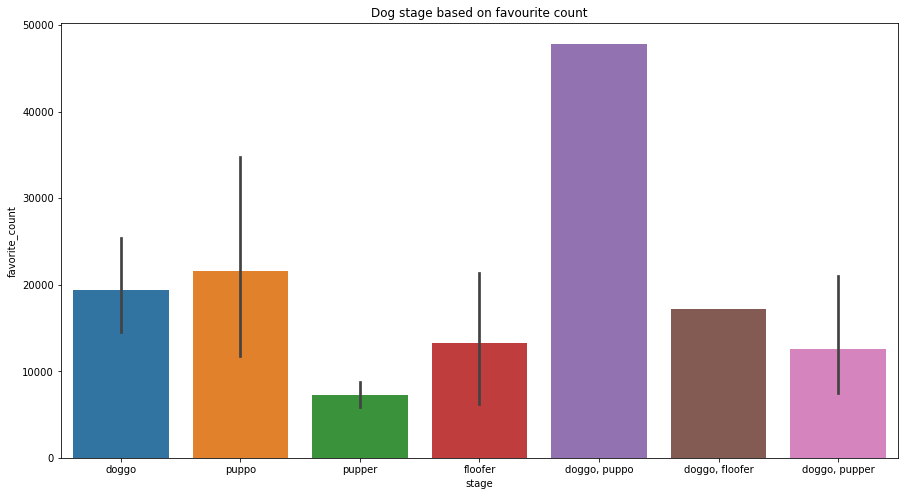

In [64]:
plt.figure(figsize=(15,8))
sn.barplot(data = df_master, x = 'stage', y ='favorite_count').set(title='Dog stage based on favourite count')


[Text(0.5, 1.0, 'Dog stage based on retweet count')]

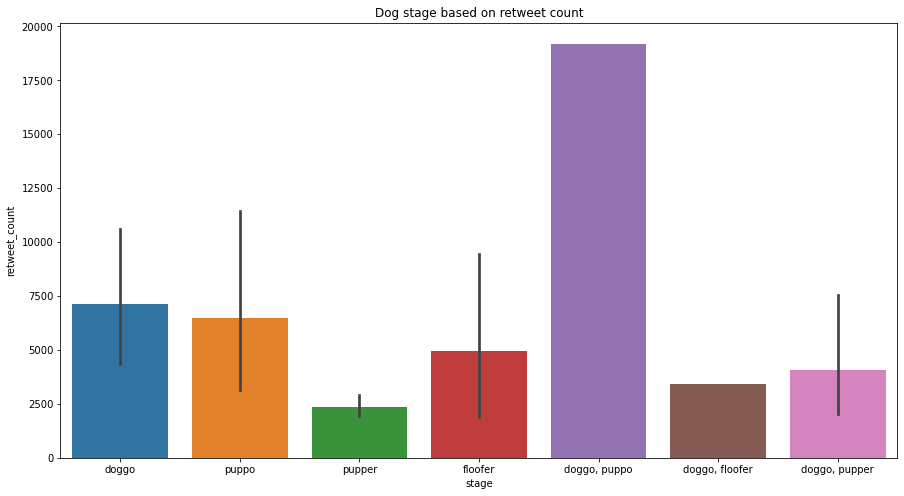

In [65]:
plt.figure(figsize=(15,8))
sn.barplot(data = df_master, x = 'stage', y ='retweet_count').set(title='Dog stage based on retweet count')


3. floofer dog stage has the highest number of retweet count and favorite count with pupper stage having the least favourite count and retweet count.

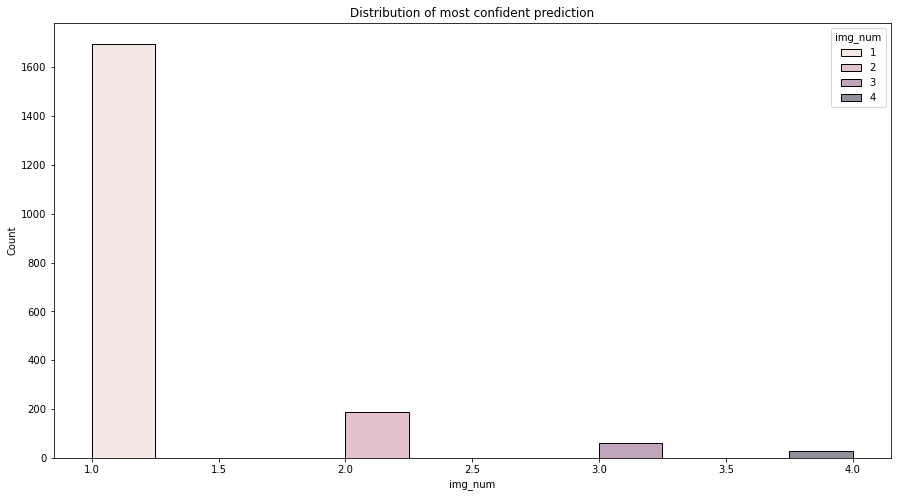

In [67]:
plt.figure(figsize=(15,8))
sn.histplot(data = df_master, x = 'img_num', hue = 'img_num').set(title='Distribution of most confident prediction');

- Most dogs have a confident prediction of 1